# Data loading and datasets creation

In [32]:
# Data loading

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

training_set = pd.read_csv('./data/npf_train.csv')
test_set = pd.read_csv('./data/npf_test_hidden.csv')

# Create class2 column
training_set['class2'] = training_set['class4'].apply(lambda x: 'nonevent' if x=='nonevent' else 'event')

del training_set['id']
del training_set['class4'] # still, just binary classification for now
del training_set['date']

del test_set['id']
del test_set['date']

del training_set['partlybad'] # useless field, it is always False
del test_set['partlybad']

# Binary classification atm
X_train = training_set[training_set.columns.difference(['class2'])]
y_train = training_set['class2'].apply(lambda x: 0 if x=='nonevent' else 1) # 0 = nonevent, 1 = event

X_test = test_set[test_set.columns.difference(['class4'])]


In [52]:
display(X_train, y_train, X_test, X_test.describe())

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,CS.mean,CS.std,...,T504.mean,T504.std,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std
0,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,1.955198,0.003374,0.000733,...,-12.808576,0.436362,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617
1,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,0.435480,0.001501,0.000572,...,-8.693842,0.428726,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479
2,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,0.000764,0.000048,...,-9.941204,1.071755,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748
3,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,0.002038,0.000751,...,-1.221172,0.112492,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903
4,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,0.000662,0.000210,...,-1.738455,1.748079,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,377.507244,5.398886,0.002360,0.000253,...,16.620652,2.322103,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306
454,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,0.002423,0.000425,...,16.608408,1.112215,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816
455,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,386.336908,11.457833,0.001993,0.000391,...,13.636214,0.499067,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015
456,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,10.932955,0.003484,0.000457,...,14.667092,1.719399,14.421092,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890


0      nonevent
1      nonevent
2      nonevent
3      nonevent
4         event
         ...   
453    nonevent
454    nonevent
455    nonevent
456    nonevent
457    nonevent
Name: class2, Length: 458, dtype: category
Categories (2, object): ['event', 'nonevent']

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,CS.mean,CS.std,...,T504.mean,T504.std,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std
0,376.610169,0.526617,376.660339,0.500203,376.934655,0.564360,376.634746,0.471236,0.000644,0.000119,...,-2.647725,0.157625,-2.851967,0.156421,-2.356066,0.174219,2.374336,1.318965,0.040709,0.024647
1,390.624932,0.453585,390.580694,0.455308,391.000685,0.505836,390.487945,0.481292,0.003707,0.000115,...,-18.447002,0.449640,-18.646384,0.448865,-18.030984,0.478829,3.850439,2.056031,0.103446,0.060432
2,375.280258,1.249087,375.479806,1.241525,375.624129,1.423506,375.571474,1.200556,0.001637,0.000428,...,3.922470,1.544781,3.485822,1.526998,4.649689,1.978654,15.498463,11.001410,0.557332,0.494026
3,382.642176,3.222805,382.890412,3.026140,383.136941,3.466259,382.937706,2.837540,0.002480,0.000510,...,7.168020,3.770103,6.933127,3.737176,7.657725,3.823123,16.909366,13.924594,0.646806,0.602040
4,381.492971,4.386929,381.608000,4.333558,382.177784,4.491875,381.588857,4.263299,0.009429,0.004438,...,12.254128,2.240346,11.941411,2.195680,12.570801,2.458619,7.596930,6.722838,0.275559,0.312076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,387.945654,8.594281,387.195208,6.395089,390.564398,12.503105,386.868542,5.561891,0.002978,0.000775,...,14.103466,1.946662,13.846229,1.908796,14.671475,2.278146,14.888953,13.891135,0.724499,0.741484
961,381.204386,0.172730,381.193333,0.174513,381.289123,0.174594,381.174737,0.179355,0.002506,0.000101,...,-5.360088,0.192002,-5.539621,0.189930,-5.018333,0.192347,1.208696,0.588515,0.022685,0.011805
962,383.915986,2.407693,383.944965,2.349077,384.052183,2.456562,383.862958,2.212343,0.006474,0.000857,...,7.115592,2.459830,6.970141,2.270736,7.698230,2.916700,16.280512,10.828638,0.572551,0.464658
963,379.521641,1.199564,379.525194,1.147027,379.778906,1.257693,379.473203,1.078942,0.000829,0.000227,...,1.878739,2.611963,1.643628,2.549993,2.697919,2.916053,15.014020,8.972121,0.546366,0.416863


,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,CS.mean,CS.std,...,T504.mean,T504.std,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,...,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,382.203461,3.199941,382.216331,3.022803,383.137855,4.051119,382.120952,2.831321,0.003052,0.000685,...,5.373158,1.628383,5.178399,1.577155,5.740758,1.862095,10.348864,7.287270,0.418032,0.358171
std,11.237627,3.207766,11.188357,2.981282,10.870552,4.287413,11.182388,2.722676,0.002190,0.000680,...,10.015864,1.031641,9.964494,0.995852,10.101577,1.181897,6.620209,5.007745,0.311692,0.282794
min,359.240488,0.094845,359.096905,0.088273,360.350743,0.111492,358.245902,0.087059,0.000243,0.000023,...,-24.017093,0.024105,-23.900675,0.033329,-24.874583,0.031017,0.295937,0.121475,0.004642,0.002685
25%,373.913351,0.850122,374.040341,0.834333,375.273509,0.967263,374.018000,0.830525,0.001514,0.000270,...,-2.177937,0.721795,-2.387549,0.693572,-1.820163,0.760917,3.991261,2.371487,0.114850,0.079184
50%,381.100276,2.097653,381.132113,1.968488,382.040000,2.392523,380.931587,1.899422,0.002452,0.000510,...,6.645110,1.623915,6.359223,1.559908,7.014207,1.900331,10.477116,7.251167,0.381297,0.327694
75%,389.117589,4.479012,389.027135,4.216838,389.758506,5.783256,388.944095,3.939391,0.003953,0.000848,...,13.433242,2.459182,13.212069,2.340095,13.860287,2.845150,16.354165,11.765043,0.673152,0.598445
max,421.511176,22.822280,421.057843,19.881541,422.627800,40.366704,419.924510,17.985023,0.015837,0.006277,...,27.275579,5.114767,27.110436,5.145668,27.938861,5.131955,22.597583,16.830501,1.197271,1.055615


**Observation: we have a dataset where p is not << n**, but only <: probably we'll need some dimensionality reduction technique like LDA or similars.

# Some graphs

Pairplot of training set


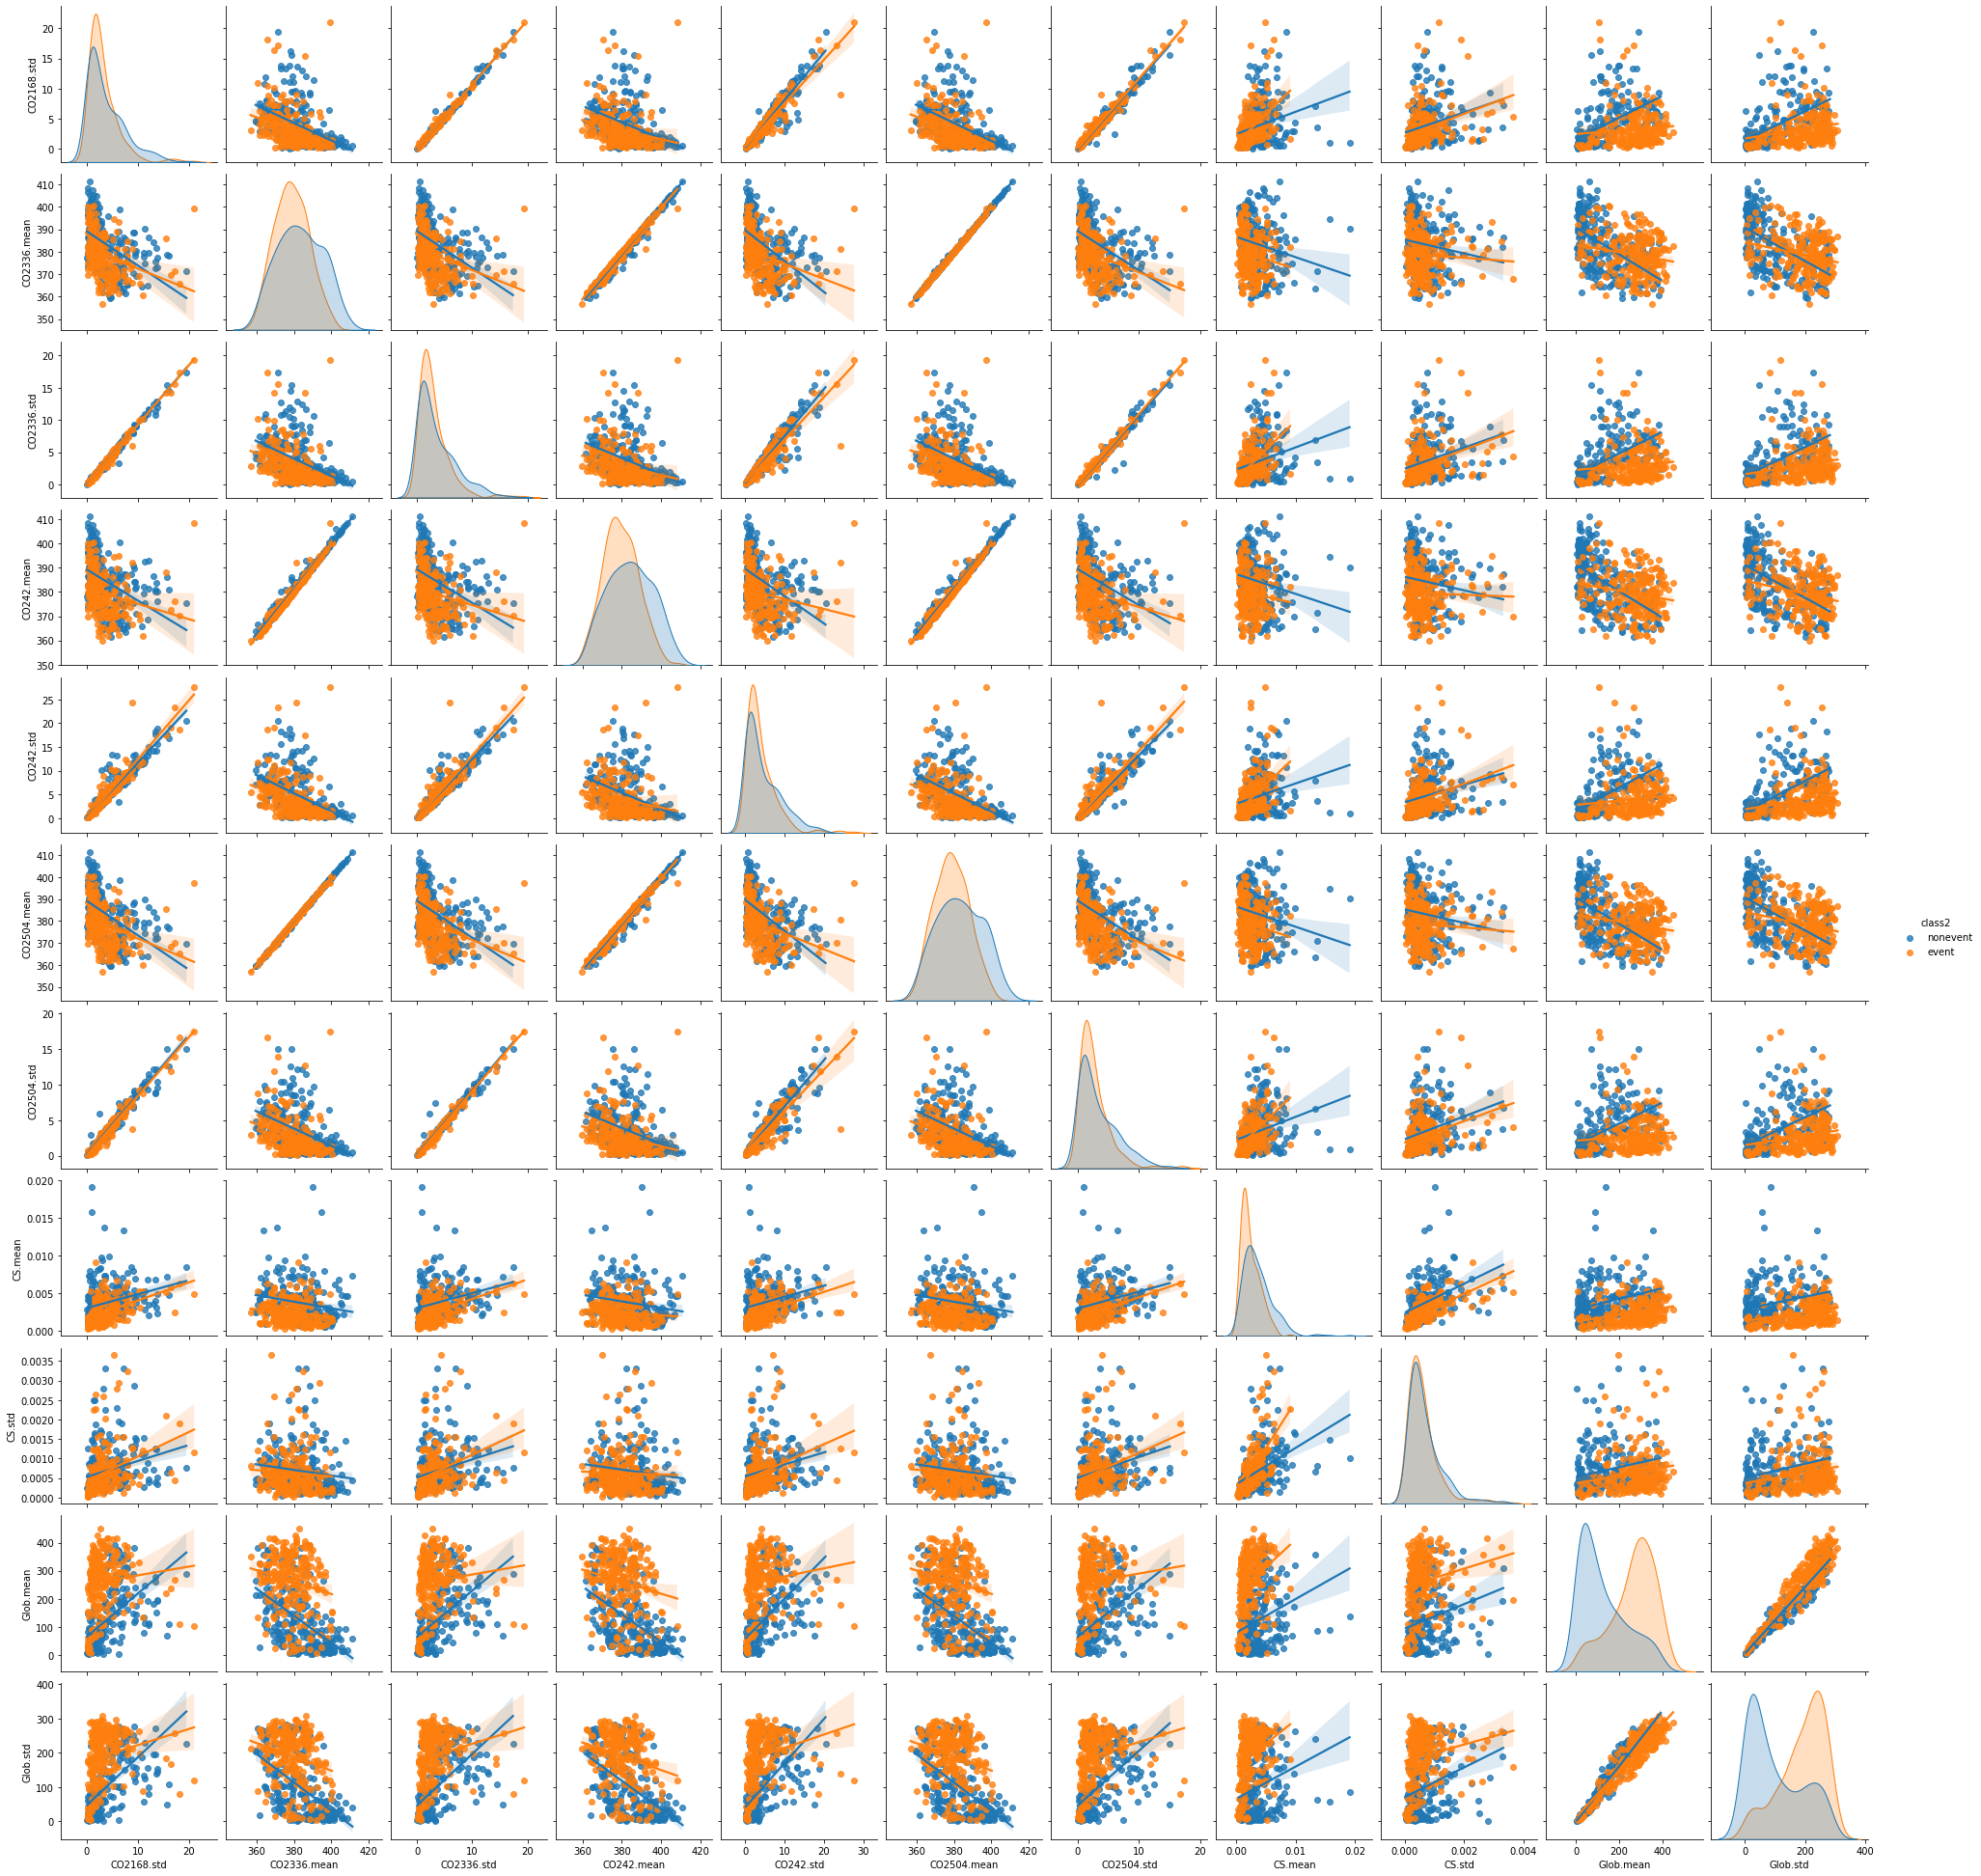

In [53]:
print('Pairplot of training set')
sns.pairplot(training_set, hue='class2', vars=X_train.columns[1:12], kind='reg')

Correlation on means
                CO2168.mean  CO2336.mean  CO242.mean  CO2504.mean  Glob.mean  \
CO2168.mean        1.000000     0.999712    0.993856     0.998910  -0.435391   
CO2336.mean        0.999712     1.000000    0.992314     0.999671  -0.431139   
CO242.mean         0.993856     0.992314    1.000000     0.990206  -0.430814   
CO2504.mean        0.998910     0.999671    0.990206     1.000000  -0.429165   
Glob.mean         -0.435391    -0.431139   -0.430814    -0.429165   1.000000   
H2O168.mean       -0.482878    -0.488900   -0.427582    -0.495836   0.151393   
H2O336.mean       -0.479076    -0.485069   -0.424219    -0.491971   0.146458   
H2O42.mean        -0.490270    -0.496272   -0.434214    -0.503223   0.161713   
H2O504.mean       -0.476632    -0.482597   -0.422003    -0.489462   0.142720   
H2O672.mean       -0.474047    -0.480002   -0.419534    -0.486852   0.139688   
H2O84.mean        -0.485551    -0.491581   -0.429708    -0.498541   0.156429   
NET.mean          -

<AxesSubplot:>

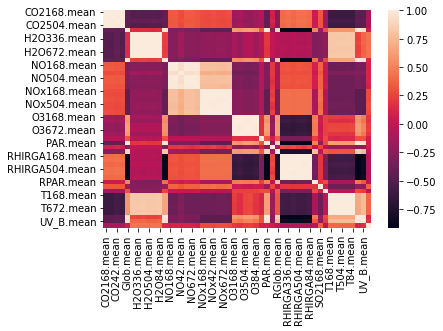

In [54]:
print('Correlation on means')
mean_cols = training_set[[c for c in training_set if 'mean' in c]]
cor_means = mean_cols.corr()
print(cor_means)
sns.heatmap(cor_means)

Correlation on stds
               CO2168.std  CO2336.std  CO242.std  CO2504.std  Glob.std  \
CO2168.std       1.000000    0.995680   0.949938    0.982188  0.326488   
CO2336.std       0.995680    1.000000   0.937549    0.990299  0.323010   
CO242.std        0.949938    0.937549   1.000000    0.912664  0.363861   
CO2504.std       0.982188    0.990299   0.912664    1.000000  0.304773   
Glob.std         0.326488    0.323010   0.363861    0.304773  1.000000   
H2O168.std       0.501733    0.499832   0.519571    0.491650  0.511292   
H2O336.std       0.508529    0.506059   0.525349    0.497232  0.518445   
H2O42.std        0.506882    0.504904   0.526423    0.495838  0.506172   
H2O504.std       0.516109    0.512876   0.530513    0.502849  0.519462   
H2O672.std       0.526493    0.523292   0.535956    0.513343  0.511752   
H2O84.std        0.501436    0.499085   0.521614    0.490672  0.506401   
NET.std          0.320332    0.317083   0.359978    0.297898  0.982190   
NO168.std       -0

<AxesSubplot:>

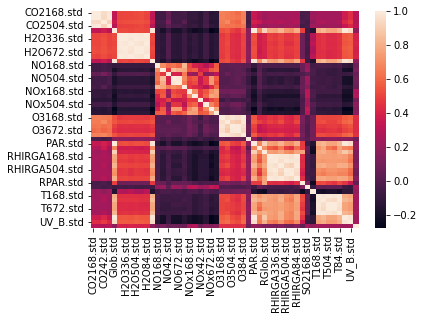

In [55]:
print('Correlation on stds')
std_cols = training_set[[c for c in training_set if 'std' in c]]
cor_std = std_cols.corr()
print(cor_std)
sns.heatmap(cor_std)

In [33]:
# Let's try some different models
from tpot import TPOTClassifier

tpot_config = {

    # Great classics
    'sklearn.linear_model.LogisticRegression': {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [1e-2, 1e-1, 1, 1e2]
    },
    'sklearn.neighbors.KNeighborsClassifier': {
        'n_neighbors': [1, 2, 3, 4, 5, 10, 20],
        'leaf_size': [20, 30, 50, 60, 100],
        'p': [1, 2],
        'num_jobs': [16]
    },
    'sklearn.svm.SVC': {
        'C': [0.5, 1, 2, 5, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [1, 2, 3, 4, 5],
        'gamma': ['scale', 'auto']
    },

    # Bayes
    'sklearn.naive_bayes.GaussianNB': {
        'var_smoothing': [1e-10, 1e-9, 1e-8]
    },
    'sklearn.naive_bayes.BernoulliNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },
    'sklearn.naive_bayes.MultinomialNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },
    'sklearn.naive_bayes.CategoricalNB': {
        'alpha': [0, 1, 2, 5],
        'fit_prior': [True, False]
    },

    # Trees
    'sklearn.tree.DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy']
    },
    'sklearn.ensemble.RandomForestClassifier': {
        'n_estimators': [50, 100, 200, 500],
        'criterion': ['gini', 'entropy']
    },

    # Dimensionality reduction
    'sklearn.linear_model.Ridge': {
        'alpha': [0.5, 1, 2, 5],
        'normalize': [True, False]
    },
    'sklearn.discriminant_analysis.LinearDiscriminantAnalysis': {}
}

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, config_dict=tpot_config)
tpot.fit(X_train, y_train)
tpot.score(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(GaussianNB(input_matrix, var_smoothing=1e-08), C=100.0, penalty=l2)


0.8580786026200873

# Try taking into account also date

In [29]:
from datetime import datetime

training_set = pd.read_csv('./data/npf_train.csv')
test_set = pd.read_csv('./data/npf_test_hidden.csv')

# Create class2 column
training_set['class2'] = training_set['class4'].apply(lambda x: 'nonevent' if x=='nonevent' else 'event')
training_set['date'] = training_set['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
training_set['date'] = training_set['date'].astype('category').cat.codes

del training_set['id']
del training_set['class4'] # still, just binary classification for now

del test_set['id']

del training_set['partlybad'] # useless field, it is always False
del test_set['partlybad']

# Binary classification atm
X_train = training_set[training_set.columns.difference(['class2'])]
y_train = training_set['class2'].apply(lambda x: 0 if x=='nonevent' else 1) # 0 = nonevent, 1 = event

X_test = test_set[test_set.columns.difference(['class4'])]


In [31]:
# Let's try some different models
from tpot import TPOTClassifier

tpot_config = {
    'sklearn.ensemble.RandomForestClassifier': {
        'n_estimators': [50, 100, 200, 500],
        'criterion': ['gini', 'entropy']
    }
}

tpot = TPOTClassifier(generations=1, population_size=20, verbosity=2, random_state=42, config_dict=tpot_config)
tpot.fit(X_train, y_train)
tpot.score(X_train, y_train)


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8648112756808409

Best pipeline: RandomForestClassifier(input_matrix, criterion=entropy, n_estimators=200)


1.0